In [2]:
import numpy as np
import os
import cv2
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
path="CorsicanDB/training/rgb"
import torch
import torch.nn as nn

In [3]:
#torch.cuda.is_available()
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [4]:
training_data=[]
def dataset():
    count=0
    for img in os.listdir(path):
        count+=1
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array,(500,500))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) 
        training_data.append(img_array)
        #if count>199:
        #    break

In [5]:
dataset()


In [6]:
training_data[0].shape

(500, 500, 3)

In [6]:
'''class CAE(nn.Module):
    def __init__(self, num_features, emb_dim):

        super(CAE, self).__init__()
        self.conv1 = nn.Conv2d(num_features, 32, kernel_size=4, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.bn1 = nn.BatchNorm2d(64)
        self.act1 = nn.ELU(True)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.bn2 = nn.BatchNorm2d(128)
        self.act2 = nn.ELU(True)

        self.head = nn.Sequential(
            nn.Linear(500, 500),
            nn.ELU(),
            nn.Linear(128, 64),
            nn.ELU(),
            nn.Linear(64, 32),
            nn.ELU(),
            nn.Linear(32, emb_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(emb_dim, 32),
            nn.ELU(),
            nn.Linear(32, 64),
            nn.ELU(),
            nn.Linear(64, 128),
            nn.ELU(),
            nn.Linear(128, num_features),
        )

        self.num_features = num_features

    def get_embedding(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.act1(x)

        x = self.conv2(x)
        x = self.pool2(x)
        x = self.act2(x)
        
        x = torch.flatten(x, start_dim=1)

        x = self.head(x)

        return x

    def forward(self, x):
        x = x.permute(0, 3, 1, 2)

        x = self.get_embedding(x)
        x = self.decoder(x)
        x = torch.reshape(x, (x.shape[0], self.num_features))

        return x'''

'class CAE(nn.Module):\n    def __init__(self, num_features, emb_dim):\n\n        super(CAE, self).__init__()\n        self.conv1 = nn.Conv2d(num_features, 32, kernel_size=4, padding=1)\n        self.pool1 = nn.MaxPool2d(2)\n        self.bn1 = nn.BatchNorm2d(64)\n        self.act1 = nn.ELU(True)\n\n        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, padding=1)\n        self.pool2 = nn.MaxPool2d(2)\n        self.bn2 = nn.BatchNorm2d(128)\n        self.act2 = nn.ELU(True)\n\n        self.head = nn.Sequential(\n            nn.Linear(500, 500),\n            nn.ELU(),\n            nn.Linear(128, 64),\n            nn.ELU(),\n            nn.Linear(64, 32),\n            nn.ELU(),\n            nn.Linear(32, emb_dim),\n        )\n\n        self.decoder = nn.Sequential(\n            nn.Linear(emb_dim, 32),\n            nn.ELU(),\n            nn.Linear(32, 64),\n            nn.ELU(),\n            nn.Linear(64, 128),\n            nn.ELU(),\n            nn.Linear(128, num_features),\n        )\n\

In [7]:
'''from torch.utils.data import Dataset
import numpy as np 
import torch

class TS_Dataset(Dataset):
    """Time Series dataset."""

    def __init__(self, stack):
        self.stack = stack
        self.size = self.stack.shape[0]

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        x = self.stack[idx, :]

        return torch.FloatTensor(x)'''

'from torch.utils.data import Dataset\nimport numpy as np \nimport torch\n\nclass TS_Dataset(Dataset):\n    """Time Series dataset."""\n\n    def __init__(self, stack):\n        self.stack = stack\n        self.size = self.stack.shape[0]\n\n    def __len__(self):\n        return self.size\n\n    def __getitem__(self, idx):\n        if torch.is_tensor(idx):\n            idx = idx.tolist()\n\n        x = self.stack[idx, :]\n\n        return torch.FloatTensor(x)'

In [7]:
training_data=np.array(training_data)

In [8]:
training_data.shape

(595, 500, 500, 3)

In [50]:
class CAE(nn.Module): 
    def __init__(self, num_features, emb_dim):
        super(CAE, self).__init__()
        self.conv1 = nn.Conv2d(num_features, 12, kernel_size=3, padding=1)  # 3 channels for RGB
        self.pool1 = nn.MaxPool2d(2)
        self.bn1 = nn.BatchNorm2d(12)
        self.act1 = nn.ELU(True)

        self.conv2 = nn.Conv2d(12, 24, kernel_size=3, padding=1)
        #self.pool2 = nn.MaxPool2d(2)
        self.bn2 = nn.BatchNorm2d(24)
        self.act2 = nn.ELU(True)

        self.conv3 = nn.Conv2d(24, 48, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2)
        self.bn3 = nn.BatchNorm2d(48)
        self.act3 = nn.ELU(True)

        # Updated Linear Layer to match the flattened size
        self.head = nn.Sequential(
            nn.Linear(125*125*48, 256),
            nn.ELU(),
            
            
            
            nn.Linear(256, emb_dim),  # Embedding dimension
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(emb_dim, 256),
            nn.ELU(),
            
           
            
            nn.Linear(256, 48*125*125),
            nn.ELU(),
            
            nn.Unflatten(1, (48, 125, 125)),
            nn.ConvTranspose2d(48, 24, kernel_size=3, padding=1,stride=2,output_padding=1),
            nn.ELU(True),
            nn.ConvTranspose2d(24, 12, kernel_size=3, padding=1,stride=1,output_padding=0),
            nn.ELU(True),
            nn.ConvTranspose2d(12, num_features, kernel_size=3, padding=1,stride=2,output_padding=1),
            nn.ELU(True)
        )

        self.num_features = num_features

    def get_embedding(self, x):
        x = x.permute(0, 3, 1, 2)
        x = self.conv1(x)
        x = self.pool1(x)
        x=  self.bn1(x)
        x = self.act1(x)

        x = self.conv2(x)
        #x = self.pool2(x)
        x=  self.bn2(x)
        x = self.act2(x)
        
        x = self.conv3(x)
        x = self.pool3(x)
        x=  self.bn3(x)
        x = self.act3(x)
        
        print("conv layers size:",x.size())
        x = torch.flatten(x, start_dim=1)
        print("flattened size:",x.size())
        x = self.head(x)
        print("head:",x.size())
        return x

    def forward(self, x):
        
        x = self.get_embedding(x)
        x = self.decoder(x)
        #print(x.size())
        x = torch.reshape(x, (x.shape[0],self.num_features,500,500))  # Reshape back to 500x500 with 3 channels
        x = x.permute(0, 3, 2, 1)
        #print("final size:",x.size)
        return x


In [7]:
torch.cuda.is_available()
torch.cuda.empty_cache()

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [11]:
loader=torch.FloatTensor(training_data)

In [52]:
#loader= TS_Dataset(training_data)
trainloader = torch.utils.data.DataLoader(loader, batch_size=16,
                                          shuffle=True)
net = CAE(num_features = 3, emb_dim = 128).to(device)
net = net.train()

In [14]:
import torch.optim as optim
epoch_counts = 20
#batch_size = 64
lr = 0.001
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

for epoch in range(epoch_counts):
    running_loss = 0.0
    epoch_avg_loss = 0
    i = 1
    for data in trainloader:
        inputs = data

        inputs = inputs.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_avg_loss += loss.item()
        if i % 4 == 3:    
            print(f'\n[{epoch + 1}] loss: {running_loss / 4:.3f} , avg_loss {epoch_avg_loss / i:.3f}\n')
            running_loss = 0.0

        i += 1


[1] loss: 12199.836 , avg_loss 16266.448


[1] loss: 13403.026 , avg_loss 14630.207


[1] loss: 10276.508 , avg_loss 13047.044


[1] loss: 8248.223 , avg_loss 11767.358


[1] loss: 6619.247 , avg_loss 10683.545


[1] loss: 6301.903 , avg_loss 9921.521


[1] loss: 4975.967 , avg_loss 9188.846


[1] loss: 5296.599 , avg_loss 8686.621


[1] loss: 4614.866 , avg_loss 8221.277


[2] loss: 3234.025 , avg_loss 4312.033


[2] loss: 4183.663 , avg_loss 4238.679


[2] loss: 3956.010 , avg_loss 4135.890


[2] loss: 3974.586 , avg_loss 4092.876


[2] loss: 3813.389 , avg_loss 4034.036


[2] loss: 3427.486 , avg_loss 3928.549


[2] loss: 3810.625 , avg_loss 3911.079


[2] loss: 3515.865 , avg_loss 3860.084


[2] loss: 3852.360 , avg_loss 3859.201


[3] loss: 2688.432 , avg_loss 3584.577


[3] loss: 4096.573 , avg_loss 3877.146


[3] loss: 4206.740 , avg_loss 3996.998


[3] loss: 3881.542 , avg_loss 3966.210


[3] loss: 3361.632 , avg_loss 3838.930


[3] loss: 3518.555 , avg_loss 3783.213


[3] los

In [15]:
torch.save(net, "models/" + 'autoencode_epoch_best(maybe)'+str(epoch+1))

In [2]:
import numpy as np
import os
import cv2
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
path="CorsicanDB/training/rgb"
import torch
import torch.nn as nn


In [12]:
net=torch.load("models/autoencode_epoch_best(maybe1)20")


C:\Users\prabh\AppData\Local\Temp\ipykernel_2924\2251334908.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net=torch.load("models/autoencode_epoch_best(maybe1)20")


In [70]:
image_example=12
d=training_data[image_example]
d=torch.FloatTensor(d)
d = d.unsqueeze(0)
d.size()
d=d.to(device)
output=net(d)

In [71]:
output1=output.squeeze(0)
output1.shape
output12=output1.detach().cpu().numpy()
output12.shape
output_np = (output12 - output12.min()) / (output12.max() - output12.min())

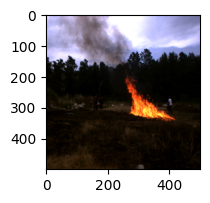

In [72]:
plt.figure(figsize=(2,2))
plt.imshow(training_data[image_example])
plt.show()

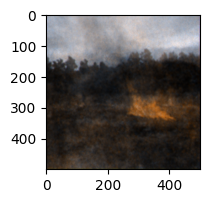

In [73]:
plt.figure(figsize=(2,2))
plt.imshow(output_np)
plt.show()

In [56]:
'''testpath="CorsicanDB/testing/rgb/416_rgb.png"
img_test=cv2.imread(testpath)
img_test=cv2.resize(img_test,(500,500))
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB) 
test=torch.FloatTensor(img_test)
test=test.unsqueeze(0)
test=test.to(device)'''

In [22]:
outputs = net.get_embedding(d)
outputs=outputs.detach().cpu().numpy()
outputs=outputs.reshape((8,16))

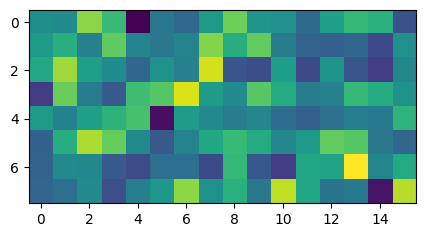

In [23]:
plt.figure(figsize=(5,10))
plt.imshow(outputs)
plt.show()

In [13]:
type(training_data)

numpy.ndarray

In [67]:
import torch.optim as optim
epoch_count=5
testloader = torch.utils.data.DataLoader(loader, batch_size=32, shuffle=False) #important to set to false here
#pbar = tqdm(testloader, leave=True)
count=0
out=[]
stacked_embs = []
#for epoch in range(epoch_count):
#optimizer = optim.Adam(net.parameters(), lr=0.001)
for data in testloader:
    
    inputs = data
    inputs = inputs.to(device)
    #optimizer.zero_grad()

    outputs = net.get_embedding(inputs)
    stacked_embs.append(outputs.detach().cpu().numpy())
    count+=1
    #print(f"Epoch: {epoch} running")
stacked_embs = np.concatenate(stacked_embs)
print(count)
    # normalization
stacked_embs = (stacked_embs - stacked_embs.min(axis=0))/(stacked_embs.max(axis=0)-stacked_embs.min(axis=0))

conv layers size: torch.Size([32, 48, 125, 125])
flattened size: torch.Size([32, 750000])
head: torch.Size([32, 128])
conv layers size: torch.Size([32, 48, 125, 125])
flattened size: torch.Size([32, 750000])
head: torch.Size([32, 128])
conv layers size: torch.Size([32, 48, 125, 125])
flattened size: torch.Size([32, 750000])
head: torch.Size([32, 128])
conv layers size: torch.Size([32, 48, 125, 125])
flattened size: torch.Size([32, 750000])
head: torch.Size([32, 128])
conv layers size: torch.Size([32, 48, 125, 125])
flattened size: torch.Size([32, 750000])
head: torch.Size([32, 128])
conv layers size: torch.Size([32, 48, 125, 125])
flattened size: torch.Size([32, 750000])
head: torch.Size([32, 128])
conv layers size: torch.Size([32, 48, 125, 125])
flattened size: torch.Size([32, 750000])
head: torch.Size([32, 128])
conv layers size: torch.Size([32, 48, 125, 125])
flattened size: torch.Size([32, 750000])
head: torch.Size([32, 128])
conv layers size: torch.Size([32, 48, 125, 125])
flatten

In [71]:
stacked_embs[0].shape

(128,)

In [63]:
stacked_emb = stacked_em.reshape((595, 500))

ValueError: cannot reshape array of size 76160 into shape (595,500)

In [92]:
from sklearn.cluster import KMeans

n_clusters = 5

f_stacked_embs = stacked_embs

model = KMeans(n_clusters).fit(f_stacked_embs)
clusters = model.predict(f_stacked_embs)

#img_clusters = clusters.reshape((5,4))

In [94]:
clusters.shape

(595,)

In [93]:
clusters.reshape()

TypeError: reshape() takes exactly 1 argument (0 given)

TypeError: Invalid shape (2975,) for image data

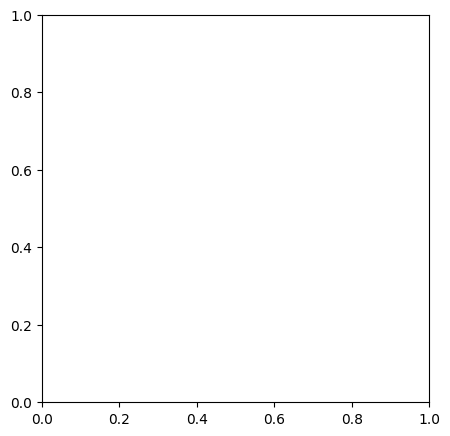

In [82]:
plt.figure(figsize=(5,10))
plt.imshow(clusters)#, cmap="tab10", interpolation="nearest")
plt.show()

In [26]:
'''fig, axes = plt.subplots(1,3,figsize=(15,5), sharex=True,sharey=True,tight_layout=True)

axes[0].scatter(f_stacked_embs[:,0], f_stacked_embs[:,1], s=0.5)
axes[1].scatter(f_stacked_embs[:,0], f_stacked_embs[:,2], s=0.5)
axes[2].scatter(f_stacked_embs[:,2], f_stacked_embs[:,1], s=0.5)

plt.show()'''

'fig, axes = plt.subplots(1,3,figsize=(15,5), sharex=True,sharey=True,tight_layout=True)\n\naxes[0].scatter(f_stacked_embs[:,0], f_stacked_embs[:,1], s=0.5)\naxes[1].scatter(f_stacked_embs[:,0], f_stacked_embs[:,2], s=0.5)\naxes[2].scatter(f_stacked_embs[:,2], f_stacked_embs[:,1], s=0.5)\n\nplt.show()'

In [27]:
'''# Training setup
device = "cuda" if torch.cuda.is_available() else "cpu"
net = SpatialCAE().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

# Training loop
epoch_counts = 5
for epoch in range(epoch_counts):
    running_loss = 0.0
    for data in training_data:
        inputs = data.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}/{epoch_counts}, Loss: {running_loss / len(training_data):.4f}')'''

'# Training setup\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\nnet = SpatialCAE().to(device)\ncriterion = nn.MSELoss()\noptimizer = torch.optim.Adam(net.parameters(), lr=1e-3)\n\n# Training loop\nepoch_counts = 5\nfor epoch in range(epoch_counts):\n    running_loss = 0.0\n    for data in training_data:\n        inputs = data.to(device)\n        optimizer.zero_grad()\n        outputs = net(inputs)\n        loss = criterion(outputs, inputs)\n        loss.backward()\n        optimizer.step()\n        running_loss += loss.item()\n\n    print(f\'Epoch {epoch + 1}/{epoch_counts}, Loss: {running_loss / len(training_data):.4f}\')'